In [1]:
import numpy as np
from matplotlib import pyplot as plt

import time
np.random.seed(time.gmtime())

### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

## Parameters

In [2]:
N = 3         # number of doors
M = N - 2     # number of doors to open
K = 100000    # number of simulations

if (N-M < 2): print("At least two doors should remain closed!")
if (M < 0): print("M must be positive!")

# 1) One simulation

## Initial Setup

In [3]:
doors = np.empty(N, dtype='object')

for i in range(len(doors)): doors[i] = 'goat'

labels = np.arange(N)
    
k_car = np.random.choice(labels)    
doors[k_car] = 'car'

doors

array(['goat', 'car', 'goat'], dtype=object)

## The Game 

The competitor chooses one door, which remains closed

In [4]:
k_chosen = np.random.choice(labels) 

if k_chosen==k_car : doors[k_chosen] = 'car&chosen'
else : doors[k_chosen] = 'goat&chosen'

doors

array(['goat&chosen', 'car', 'goat'], dtype=object)

The host, who knows were the car is, opens $M \leq N - 2$ doors with goats behind them

In [5]:
labels = np.delete(labels, (k_car, k_chosen))

for i in range(M):
    j = np.random.choice(labels) 
    doors[j] = 'opened'
    labels = np.array(list(filter(lambda x: x != j, labels)), dtype=int) # Equivalent to "np.delete(labels, np.where(labels == j)[0][0])", but faster
    
doors

array(['goat&chosen', 'car', 'opened'], dtype=object)

The closed doors that neither are chosen nor hide a car are:

In [6]:
labels

array([], dtype=int32)

The competitor can change his chosen door

In [7]:
Change = True

In [8]:
if Change==True :    
    if k_chosen==k_car : 
        j = np.random.choice(labels) 
        doors[k_chosen] = 'car'
        doors[j] = 'goat&chosen'
    else :
        labels = np.append(labels, int(k_car))
        print(labels)
        j = np.random.choice(labels) 
        doors[k_chosen] = 'goat'
        if j==k_car: doors[j] = 'car&chosen'
        else : doors[j] = 'goat&chosen'
        
doors

[1]


array(['goat', 'car&chosen', 'opened'], dtype=object)

# 2) Repeated simulations

In [9]:
def Simulation(N, M, Change):
    doors = np.empty(N, dtype='object')
    for i in range(len(doors)): doors[i] = 'goat'
    
    labels = np.arange(N)
    k_car = np.random.choice(labels)     
    doors[k_car] = 'car'
    
    k_chosen = np.random.choice(labels) 
    if k_chosen==k_car : doors[k_chosen] = 'car&chosen'
    else : doors[k_chosen] = 'goat&chosen'
    
    labels = np.delete(labels, (k_car, k_chosen))
    
    for i in range(M):
        j = np.random.choice(labels) 
        doors[j] = 'opened'
        labels = np.array(list(filter(lambda x: x != j, labels)), dtype=int)
            
    if Change==True : 
        if k_chosen==k_car : 
            j = np.random.choice(labels) 
            doors[k_chosen] = 'car'
            doors[j] = 'goat&chosen'
            k_chosen = j
        else :
            labels = np.append(labels, k_car)
            j = np.random.choice(labels) 
            doors[k_chosen] = 'goat'
            if j==k_car: doors[j] = 'car&chosen'
            else : doors[j] = 'goat&chosen'
            k_chosen = j
    
    if doors[k_chosen]=='car&chosen' : result = True
    else : result = False
            
    return result

In [10]:
counter_switcher = np.zeros(K)
counter_conservative = np.zeros(K)
counter_newcomer = np.zeros(K)

for i in range(K):
    if i!=0 :
        counter_switcher[i] = counter_switcher[i-1]
        counter_conservative[i] = counter_conservative[i-1]
        counter_newcomer[i] = counter_newcomer[i-1]
    
    if Simulation(N, M, True)==True : counter_switcher[i] += 1
    if Simulation(N, M, False)==True : counter_conservative[i] += 1
    if np.random.randint(N-M)==0 : counter_newcomer[i] += 1

In [11]:
for i in range(K):
    counter_switcher[i] /= i+1
    counter_conservative[i] /= i+1
    counter_newcomer[i] /= i+1

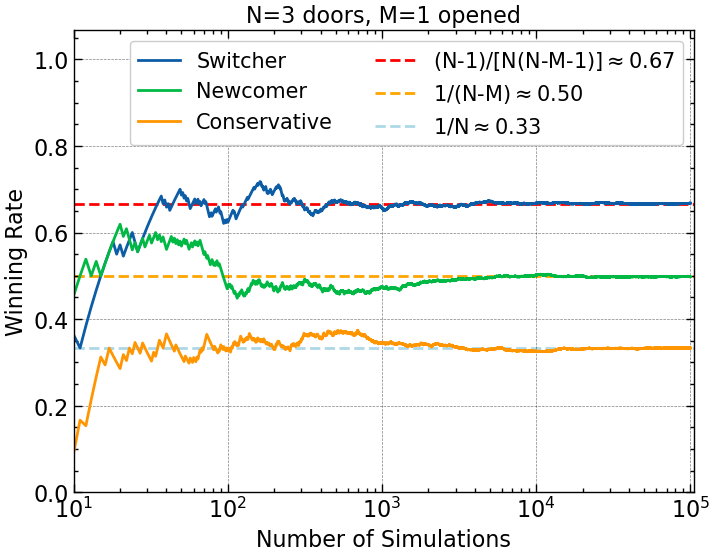

In [12]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 

x = np.arange(0, K, dtype=int)

plt.plot(x, counter_switcher, label='Switcher')
plt.plot(x, counter_newcomer, label='Newcomer')
plt.plot(x, counter_conservative, label='Conservative')
plt.axhline(y=(N-1)/(N*(N-M-1)), color='red', linestyle='--', label=f'(N-1)/[N(N-M-1)]$\\approx{(N-1)/(N*(N-M-1)):.2f}$', zorder=0)
plt.axhline(y=1/(N-M), color='orange', linestyle='--', label=f'1/(N-M)$\\approx{1/(N-M):.2f}$', zorder=0)
plt.axhline(y=1/N, color='lightblue', linestyle='--', label=f'1/N$\\approx{1/N:.2f}$', zorder=0)
plt.xlim(10)
plt.ylim(0, 1.6*(N-1)/(N*(N-M-1)))
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Winning Rate')
plt.title(f'N={N} doors, M={M} opened')
plt.legend(fontsize=15, ncol=2, loc='upper right')